# Projeto 02 - Inteligência Artificial - LESI-PL
### Machine Learning (ML) approaches and methods

### Repositório Github

Link: https://github.com/L-Anjo/IA23_G03

## Introdução
O objetivo do projeto é implementar métodos de Machine Learning (ML) para problemas, utilizando datasets públicos.

##### Equipa do projeto - Grupo 03
* Pedro Martins Nº23527
* Luís Anjo Nº23528
* Diogo Silva Nº23893

## Objetivo
O objetivo do código trata-se da implementação de métodos e técnicas sobre dois datasets públicos. Utilizamos um dataset com informações sobre animais do jardim zoológico para implementar árvores de decisão, Naive Bayes, KNN e o clustering através do K-Means, e um outro dataset de compras de um mercado para implementar as regras de Aprendizagem e Associação.

## Datasets
**Dataset 01 - Zoo Animal Classification**

Este dataset consiste em dois arquivos, o arquivo "zoo.csv", que contém os dados de cada animal do zoo e o arqurivo "zooClass.csv" que contém os detalhes das classes destes animais.

Link: https://www.kaggle.com/datasets/uciml/zoo-animal-classification


**Dataset 02 - Groceries dataset**

Este dataset consiste num arquivo "groceries.csv", que contém informações sobre várias compras de um mercado.

Link: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

# Classificação Automática

## Import das livrarias

In [25]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


from mpl_toolkits.mplot3d import Axes3D

## Obter o conteúdo do dataset dos Animais do Zoo e Preparação de dados

Aqui serão importados os ficheiros "zoo.csv" e "zooClass.csv" do dataset.
De forma a preparar os dados para a posterior análise, foi efetuado um "merge" de forma a juntar o conteúdo dos dois arquivos csv para uma só tabela.

In [26]:
# Get data from csv file
zoo_file = pd.read_csv('./datasets/zoo.csv')
zooClass_file = pd.read_csv('./datasets/zooClass.csv')
zoo = pd.DataFrame(zoo_file)
zooClass = pd.DataFrame(zooClass_file)

# Merge 
zoo_merge = pd.merge(zoo_file, zooClass_file, how='left', left_on='class_type', right_on='Class_Number')

# Prepare the data
zoo_feature_names = [col for col in zoo_merge.columns if col != 'Class_Number' and col != 'Number_Of_Animal_Species_In_Class' and col != 'Animal_Names' and col != 'Class_Type' and col != 'class_type' and col != 'animal_name']
zoo_data = zoo[zoo_feature_names]
zoo_target = zoo_merge[zoo_merge.columns.values.tolist()[20]]
zoo_target_names = zoo_target.unique().tolist()
zoo_target_names = list(zooClass['Class_Type'])

print('Features:',zoo_feature_names, 'Classes: ', zoo_target_names)

Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize'] Classes:  ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


## Contagem de Classes

Utilizamos este gráfico para obter a quantidade dos animais presentes no dataset por cada classe

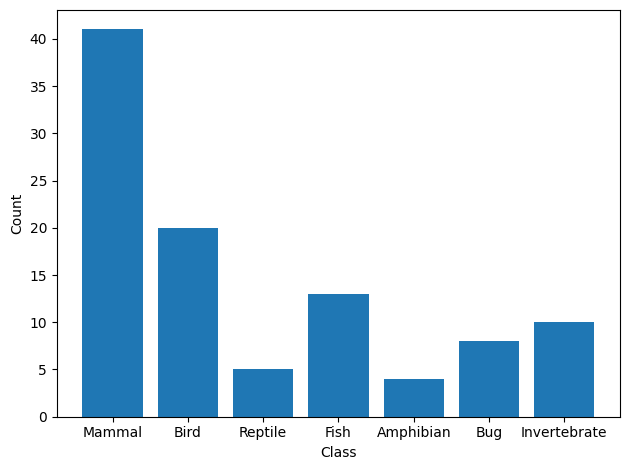

In [27]:
import matplotlib.pyplot as plt

plt.bar(zooClass_file["Class_Type"], zooClass_file["Number_Of_Animal_Species_In_Class"])
plt.ylabel('Count')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

## Verificação de Nulls

Esta parte do código é utilizada para verificar a existência de valores Null na tabela do dataset.

In [28]:
import pandas as pd
from io import StringIO

# Dataset
data = """animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
fruitbat,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
girl,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1
gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
goat,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
hamster,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
hare,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
lynx,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
mink,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1,1
mole,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
mongoose,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
opossum,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
oryx,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2
parakeet,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
penguin,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1,2
pheasant,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
platypus,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1,1
polecat,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
porpoise,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
puma,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
pussycat,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,1
raccoon,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
reindeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
rhea,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1,2
scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
seal,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,1
sealion,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,1
seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7
skimmer,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
skua,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
sole,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1
starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
stingray,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
swan,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5
tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
"""


# Cria DataFrame
df = pd.read_csv(StringIO(data), header=None)

# Encontra linhas com NaN
nan_rows = df[df.isnull().any(axis=1)]

# Imprime linhas com NaN
print(nan_rows)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Index: []


## Construção do Modelo e Avaliação

Aqui é construído o modelo de classificação, através de Árvores de decisão, utilizando a classe "DecisionTreeClassifier", e obtemos a tabela com os dados como resultado.

In [29]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()


# Data selection
from sklearn.model_selection import train_test_split

zoo_target_class = zoo_merge['class_type'] # Número da classe
X_train, X_test, y_train, y_test = train_test_split(zoo_data, zoo_target_class, test_size=0.15, random_state=27)

# Train the model on the training set
clf_model = clf.fit(X_train, y_train) # X_train: data (hair, feather, eggs, ...)
                                      # y_train: class number (1 6 4 ...)

# Evaluate the model on the test set
hd_score = clf_model.score(X_test, y_test)
print("Houldout test accuracy:", hd_score)

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(clf, X_train, y_train, cv=5)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )
f1_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

# More metrics: Precision Recall scores and Confusion matrix
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf_model.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf_model.predict(X_test)))



Houldout test accuracy: 1.0
CV Mean Accuracy: 0.953 (+/- 0.044)
Mean F1: 0.808 (+/- 0.134)
Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         3
           4      1.000     1.000     1.000         1
           6      1.000     1.000     1.000         2

    accuracy                          1.000        16
   macro avg      1.000     1.000     1.000        16
weighted avg      1.000     1.000     1.000        16

[[10  0  0  0]
 [ 0  3  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Através do método Naive Bayes, utilizando a classe "GaussianNB" obtemos a tabela com os dados como resultado.

In [30]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  # Naive Bayes

clf.fit(X_train, y_train) # X_train: data (hair, feather, eggs, ...)
                          # y_train: class number (1 6 4 ...)

# summarize the fit of the model
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))

Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         3
           4      1.000     1.000     1.000         1
           6      1.000     1.000     1.000         2

    accuracy                          1.000        16
   macro avg      1.000     1.000     1.000        16
weighted avg      1.000     1.000     1.000        16

[[10  0  0  0]
 [ 0  3  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]


Através do método KNN, utilizando a classe "KNeighborsClassifier" obtemos a tabela com os dados como resultado.

In [31]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5) #KNN

clf.fit(X_train, y_train) # X_train: data (hair, feather, eggs, ...)
                          # y_train: class number (1 6 4 ...)

# summarize the fit of the model
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))

Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         3
           4      1.000     1.000     1.000         1
           6      1.000     1.000     1.000         2

    accuracy                          1.000        16
   macro avg      1.000     1.000     1.000        16
weighted avg      1.000     1.000     1.000        16

[[10  0  0  0]
 [ 0  3  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]


## Plot Tree

Utilizamos a função "plot_tree" para gerar a árvore através dos resultados obtidos anteriormente

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


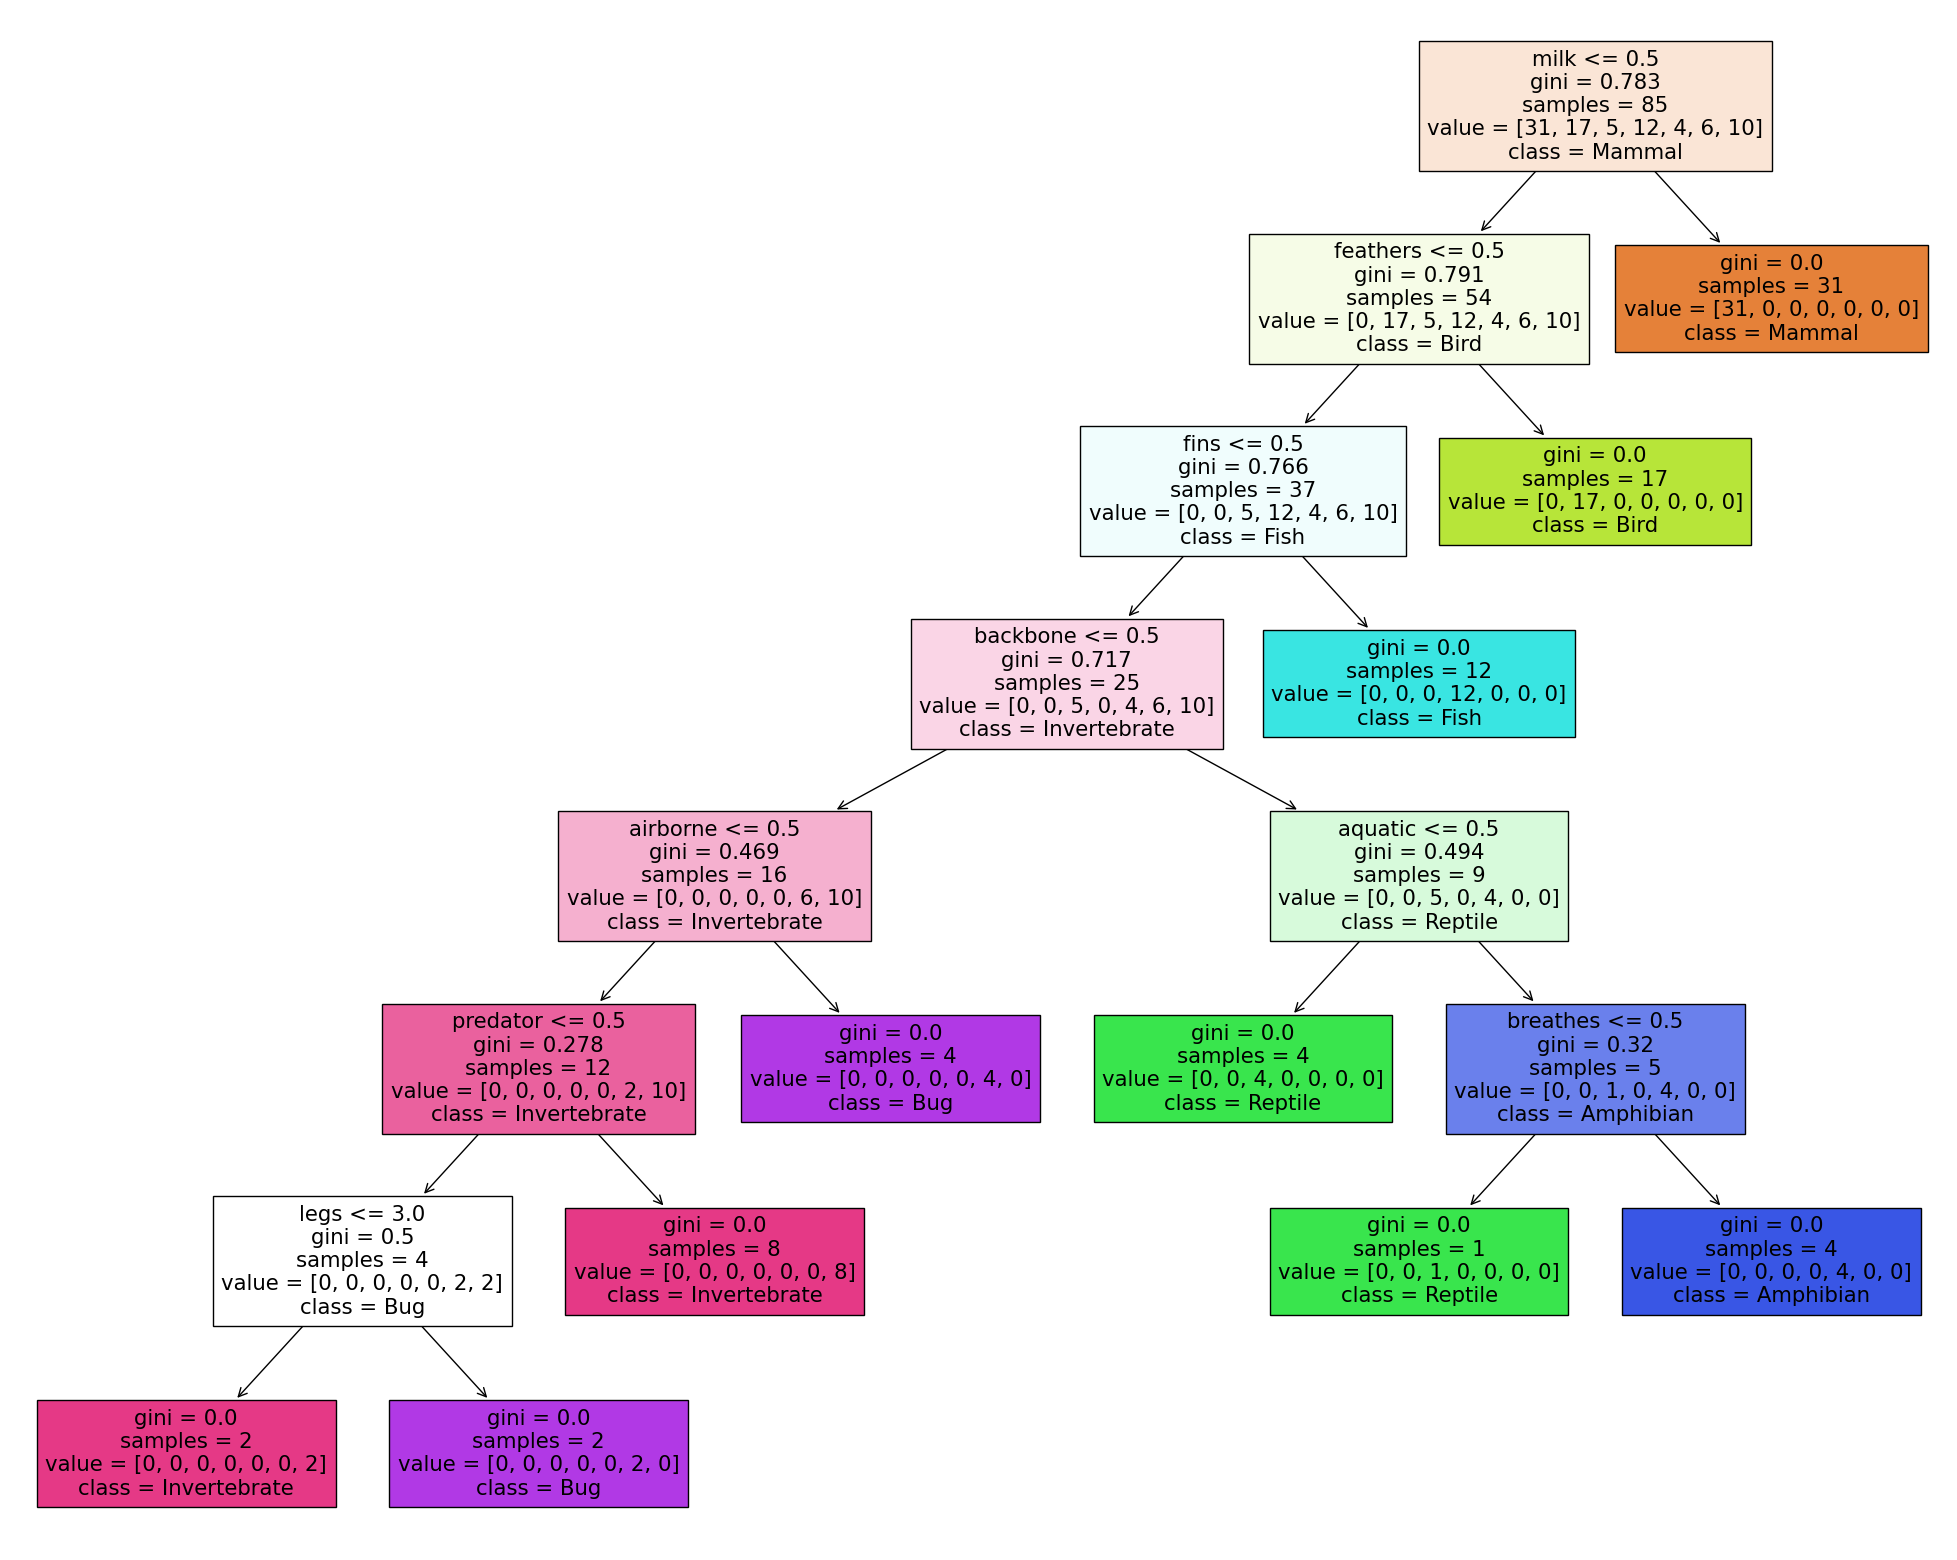

In [32]:
from sklearn import tree
from matplotlib import pyplot as plt

print(zoo_feature_names)
print(zoo_target_names)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_model, 
                   feature_names=zoo_feature_names,  
                   class_names=zoo_target_names,
                   filled=True)

# Clustering através de K-Means

## Preparação de dados

Obtemos o conteúdo dos arquivos do dataset e preparamos a informação para utilizar o método K-Means

In [33]:
# Import datasets library
zoo_file = pd.read_csv('./datasets/zoo.csv')
zooClass_file = pd.read_csv('./datasets/zooClass.csv')
zoo = pd.DataFrame(zoo_file)
zooClass = pd.DataFrame(zooClass_file)

# Prepare the data
zoo_feature_names = [col for col in zoo.columns if col != 'animal_name' and col != 'class_type']
zoo_data = zoo[zoo_feature_names]
zoo_feature_names2 = [col for col in zoo.columns if col != 'animal_name']
zoo_data2 = zoo[zoo_feature_names2[16]]-1 

# Preliminary data exploration
print(zoo_data.shape)     # Output: (101, 16)
print(zoo_feature_names)  # Output: ['hair', 'feathers', ...]

# Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_zoo = scaler.fit_transform(zoo_data)
print(scaled_zoo)

(101, 16)
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]


## Encontrar o número ideal de clusters através do método Elbow

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

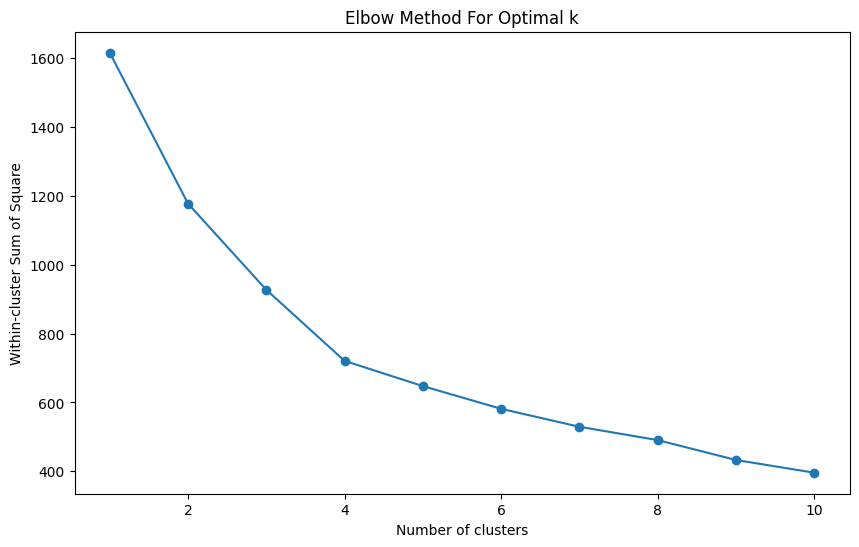

In [34]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_zoo)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

## Avaliação e Clustering

Com base nos resultados obtidos definimos um número de 5 clusters

In [35]:
# 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_zoo)

# Adjusting clusters
adj_clusters = [(x + 2) %5 for x in clusters]

print(confusion_matrix(zoo_data2.values, adj_clusters))
print(classification_report(zoo_data2.values, adj_clusters))

[[ 0  0 39  2  0  0  0]
 [ 0  0  0  0 20  0  0]
 [ 0  3  0  1  1  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [10  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         5
           3       0.81      1.00      0.90        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10

    accuracy                           0.13       101
   macro avg       0.12      0.14      0.13       101
weighted avg       0.10      0.13      0.12       101



C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and 

## Visualização dos Clusters

No gráfico seguinte será possível visualizar os clusters obtidos

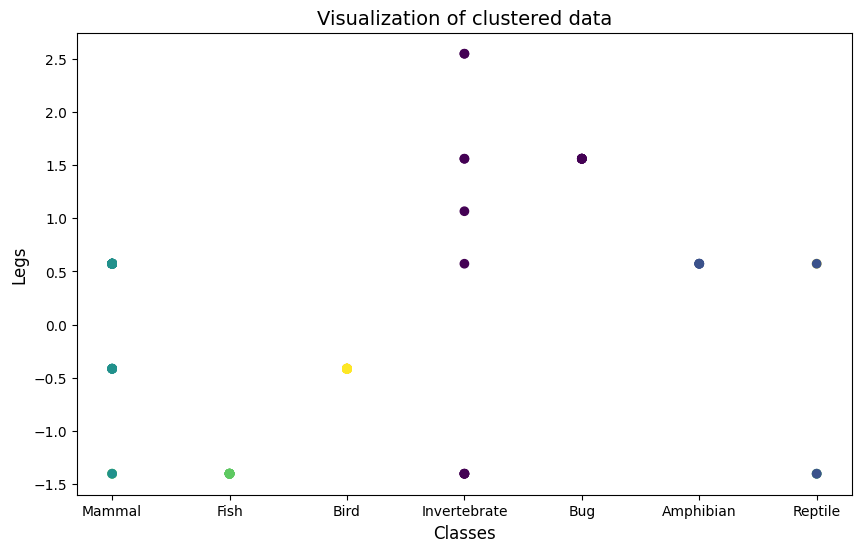

In [36]:
# Animal classes and legs
plt.figure(figsize=(10, 6))
plt.scatter(zoo_target.values,scaled_zoo[:,12], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Legs', fontsize=12)
plt.show()

## Integração de Cluster Labels no Dataset Zoo

Aqui é adicionada uma nova coluna "clusters" na tabela 

In [37]:
# Converting the zoo dataset to a DataFrame
zoo_df = pd.DataFrame(zoo_data, columns=zoo_feature_names)

# Adding the cluster labels as a new column to the DataFrame
zoo_df['cluster'] = adj_clusters

# Printing the first 5 instances of the new dataset
print(zoo_df.head())

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  cluster  
0         1         0     0     4     0         0        1        2  
1         1         0     0     4     1         0        1        2  
2         0         0     1     0     1         0        0        3  
3         1         0     0     4     0         0        1        2  
4         1         0     0     4     1         0        1        2  


## Visualização 3D dos Clusters

No gráfico seguinte podemos visualizar a distribuição dos clusters em 3D

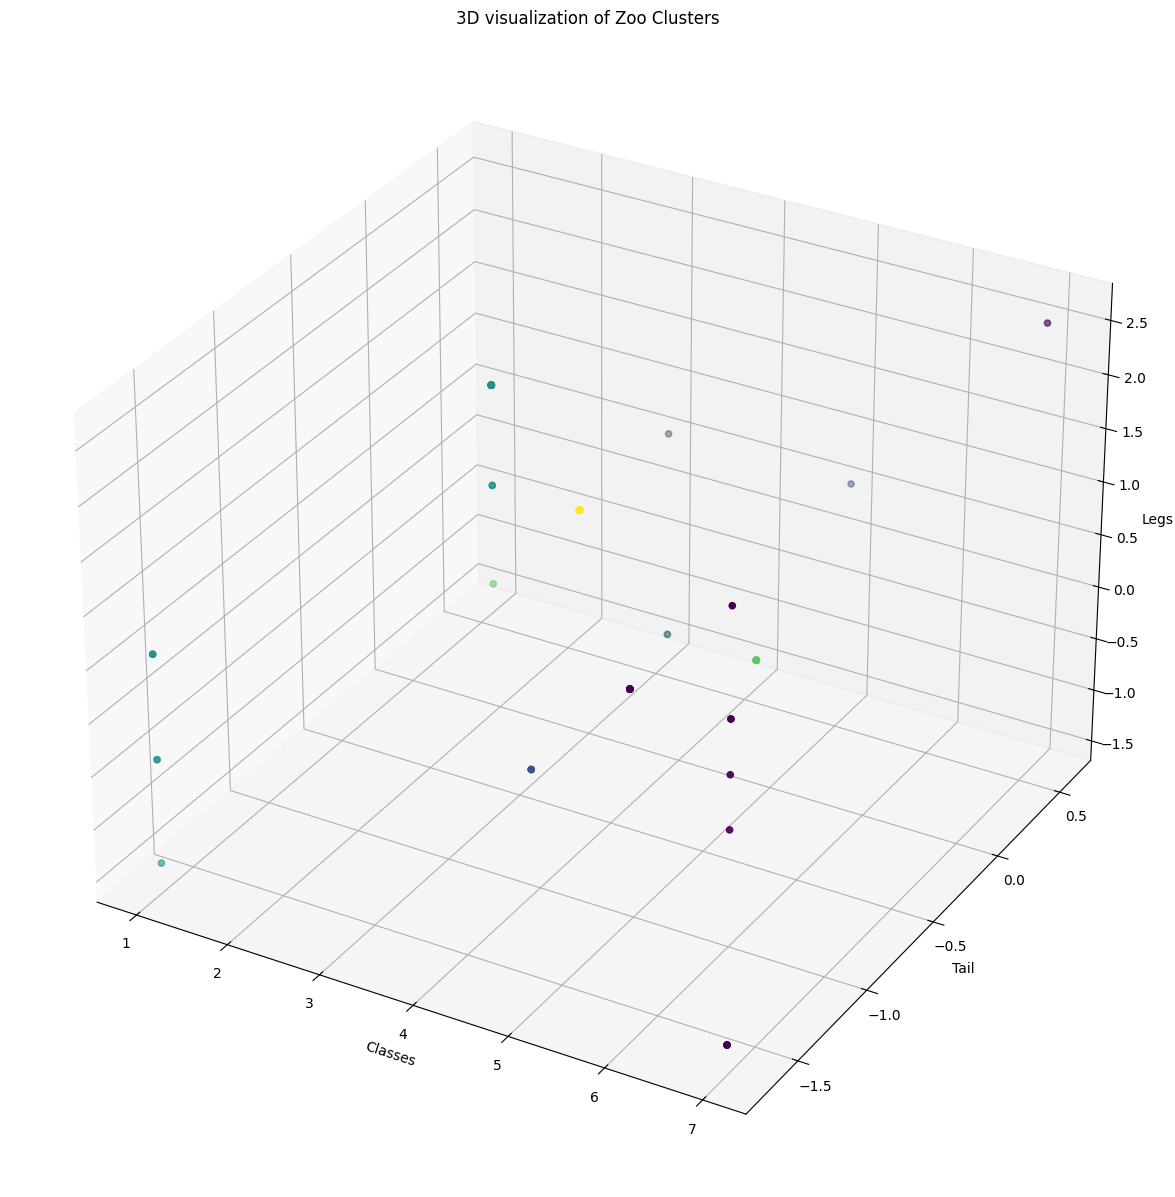

In [38]:
# 3D figure
zoo_data3D = zoo_merge[zoo_merge.columns.values.tolist()[17]]

fig = plt.figure(figsize=(16, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(zoo_data3D.values,  # Class number
           scaled_zoo[:,13],  # Tail
           scaled_zoo[:,12],  # Legs
           c=adj_clusters,           
           cmap='viridis', 
           marker='o')

# Setting labels
ax.set_xlabel('Classes')
ax.set_ylabel('Tail')
ax.set_zlabel('Legs')

# Title of the plot
ax.set_title('3D visualization of Zoo Clusters')
plt.show()

----
# Regras de Associação - Zoo Dataset

----
## Utilizando a livraria "MLXTEND"

Começamos por importar os dados dos ficheiros e efetuar o merge das tabelas

In [39]:
# Imports
from mlxtend.frequent_patterns import apriori, association_rules

# Getting the data from csv file
zoo_file = pd.read_csv('./datasets/zoo.csv')
zooClass_file = pd.read_csv('./datasets/zooClass.csv')
zoo = pd.DataFrame(zoo_file)
zooClass = pd.DataFrame(zooClass_file)

zoo_merge = pd.merge(zoo_file, zooClass_file, how='left', left_on='class_type', right_on='Class_Number')
zoo_merge.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


## Tabela Pivot

É gerada a tabela Pivot através dos dados do dataset, esta tabela pivot servirá para efetuar o algoritmo das Regras de Aprendizagem

In [40]:
# Group
ds_grouped = zoo_merge.groupby(['legs', 'class_type'], as_index=False).agg({'Class_Type':'count'})
ds_grouped.head(100)

# Creating apriori data structure
ds_pivot = pd.pivot(data=ds_grouped, index='legs', columns='class_type',
                                    values='Class_Type').fillna(0).applymap(lambda x: True if x > 0 else False)

ds_pivot.tail(10)

C:\Users\pedro\AppData\Local\Temp\ipykernel_2216\1315267813.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  values='Class_Type').fillna(0).applymap(lambda x: True if x > 0 else False)


class_type,1,2,3,4,5,6,7
legs,,,,,,,
0,True,False,True,True,False,False,True
2,True,True,False,False,False,False,False
4,True,False,True,False,True,False,True
5,False,False,False,False,False,False,True
6,False,False,False,False,False,True,True
8,False,False,False,False,False,False,True


## Regras de Associação

Através do algoritmo Apriori é possivel gerar as regras de associação

In [41]:
# Rules
min_support=0.13
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
rules = association_rules(freq_itemsets, metric="support", min_threshold = min_support)    
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),(2),0.500000,0.166667,0.166667,0.333333,2.0,0.083333,1.25,1.00
1,(2),(1),0.166667,0.500000,0.166667,1.000000,2.0,0.083333,inf,0.60
2,(1),(3),0.500000,0.333333,0.333333,0.666667,2.0,0.166667,2.00,1.00
3,(3),(1),0.333333,0.500000,0.333333,1.000000,2.0,0.166667,inf,0.75
4,(1),(4),0.500000,0.166667,0.166667,0.333333,2.0,0.083333,1.25,1.00


## Funções de Utilidade 

Devido ao conteúdo limitado do dataset Zoo Animals, não consguimos desenvolver funções utilizando as Regras de Associação, assim só nos foi possível criar duas funções simples de forma a obter o nome e a classe dos animais.

Para tal, utilizamos outro dataset para efetuar esta parte do trabalho com maior profundidade.

In [42]:
# Function for getting the class type by using animal name
def get_animal_type(zoo_info, animal_name):
    animal_names_list = zoo_info["Animal_Names"].str.split(', ')
    condition = animal_names_list.apply(lambda x: animal_name in x)
    
    if any(condition):
        class_type = zoo_info.loc[condition, "Class_Type"].values[0]
        return class_type
    else:
        return 'Animal doesnt exist' 
    
# Function for getting all the animals by using class type.
def get_animal_by_classType(zoo_info, classType):
    condition = zoo_info["class_type"] == classType
    
    if condition.any():
        animal_names_list = zoo_info.loc[condition, "Animal_Names"].values[0].split(', ')
        return animal_names_list
    else:
        return 'Animal class not found' 



In [43]:

print(get_animal_by_classType(zoo_merge, 5))
get_animal_type(zoo_merge, 'girl')

['frog', 'frog', 'newt', 'toad']


'Mammal'

# Regras de Associação - Groceries dataset

## Utilizando a livraria "MLXTEND"

Começamos por importar os dados do ficheiro

In [44]:
# Imports
from mlxtend.frequent_patterns import apriori, association_rules

# Get data from csv file
groceries = pd.read_csv('./datasets/groceries.csv')

groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Tabela Pivot

É gerada a tabela Pivot através dos dados do dataset, esta tabela pivot servirá para efetuar o algoritmo das Regras de Aprendizagem

In [45]:
# Group
ds_grouped = groceries.groupby(['Member_number', 'itemDescription'], as_index=False).agg({'Date':'count'})
ds_grouped.head(100)

# Create apriori data structure
ds_pivot = pd.pivot(data=ds_grouped, index='Member_number', columns='itemDescription',
                                    values='Date').fillna(0).applymap(lambda x: True if x > 0 else False)

ds_pivot.head(10)

C:\Users\pedro\AppData\Local\Temp\ipykernel_2216\430307709.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  values='Date').fillna(0).applymap(lambda x: True if x > 0 else False)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Regras de Associação

Através do algoritmo Apriori é possivel gerar as regras de associação.

Usamos o suporte minimo de 0.054 para tornar o resultado um pouco mais preciso.

In [46]:
# Rules
min_support=0.054
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
rules = association_rules(freq_itemsets, metric="support", min_threshold = min_support)    
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,0.009360,1.023754,0.269364
1,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
2,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
3,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,0.008692,1.028212,0.203563
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,0.007582,1.026461,0.184748


## Funções de Utilidade 

Aqui desenvolvemos duas funções para obter os resultados das regras de associação:

- **recommend_products**: Esta função simula o processo de recomendação de produtos com base nas regras de associação fornecidas, classifica assim as regras com base na métrica "lift" em ordem decrescente e utiliza um ciclo para iterar sobre as regras ordenadas, de forma a verificar se o produto alvo está presente nos antecedentes, se estiver, adiciona os consequentes associados a esse antecedente à lista de recomendações. Por fim, remove o próprio produto alvo da lista de recomendações e retorna as recomendações de produtos.

- **get_products**: Esta função chama a função recommend_products de forma a obter as recomendações com base nas regras fornecidas e imprime o produto alvo e as recomendações resultantes.


In [47]:
# Function for simulating the recommendation process
def recommend_products(rules_df, itemDescription, rec_count):
    sorted_rules = rules_df.sort_values('lift', ascending=False) 
    recommended_groceries = [] 

    for i, exam in sorted_rules["antecedents"].items(): 
        for j in list(exam):  
            if j == itemDescription:  
                recommended_groceries.append(
                    list(sorted_rules.iloc[i]["consequents"]))
    
    recommended_groceries = list({item for item_list in recommended_groceries for item in item_list}) 
    recommended_groceries.remove(itemDescription)
    return recommended_groceries[:rec_count]

# Function to get the recommended products related to a specific product
def get_products(product, rules, rec_count):
    recomended_products = recommend_products(rules, product, rec_count)
    print(f'\nTarget Grocerie: {product} ')
    print(f'Recommended Groceries: {recomended_products}')


In [48]:
# Get the recommended groceries
get_products('whole milk',rules, 100)
get_products('yogurt',rules, 100)
get_products('soda',rules, 100)
get_products('other vegetables',rules, 100)



Target Grocerie: whole milk 
Recommended Groceries: ['frozen vegetables', 'rolls/buns', 'other vegetables', 'brown bread', 'fruit/vegetable juice', 'pip fruit', 'root vegetables', 'margarine', 'bottled water', 'tropical fruit', 'frankfurter', 'yogurt', 'butter', 'shopping bags', 'canned beer', 'pastry', 'coffee']

Target Grocerie: yogurt 
Recommended Groceries: ['rolls/buns', 'other vegetables', 'soda', 'root vegetables', 'bottled water', 'tropical fruit', 'whole milk', 'bottled beer', 'canned beer', 'sausage', 'coffee']

Target Grocerie: soda 
Recommended Groceries: ['other vegetables', 'sausage', 'pip fruit', 'root vegetables', 'bottled water', 'tropical fruit', 'whole milk', 'domestic eggs']

Target Grocerie: other vegetables 
Recommended Groceries: ['rolls/buns', 'fruit/vegetable juice', 'soda', 'root vegetables', 'bottled water', 'tropical fruit', 'whole milk', 'whipped/sour cream', 'yogurt', 'bottled beer', 'shopping bags', 'domestic eggs', 'pastry', 'frankfurter']


# Conclusão

Este projeto foi uma mais-valia para o grupo, pois é uma área interessante e desafiadora. Ao longo deste percurso, dedicamos tempo considerável à pesquisa e aplicação dos conhecimentos adquiridos durante as aulas, que nos permitiu alcançar diversos resultados significativos. Através da implementação prática dos algoritmos mencionados no trabalho, fomos capazes de compreender mais profundamente os conceitos teóricos abordados nas aulas da Unidade Curricular de Inteligência Artificial. Este projeto serviu como um catalisador para consolidar a nossa compreensão sobre os fundamentos destes algoritmos e suas aplicações práticas, através de bases de dados e problemas reais.